
BFS Solution:
Jug1: 0L, Jug2: 0L
Jug1: 0L, Jug2: 3L
Jug1: 3L, Jug2: 0L
Jug1: 3L, Jug2: 3L
Jug1: 4L, Jug2: 2L


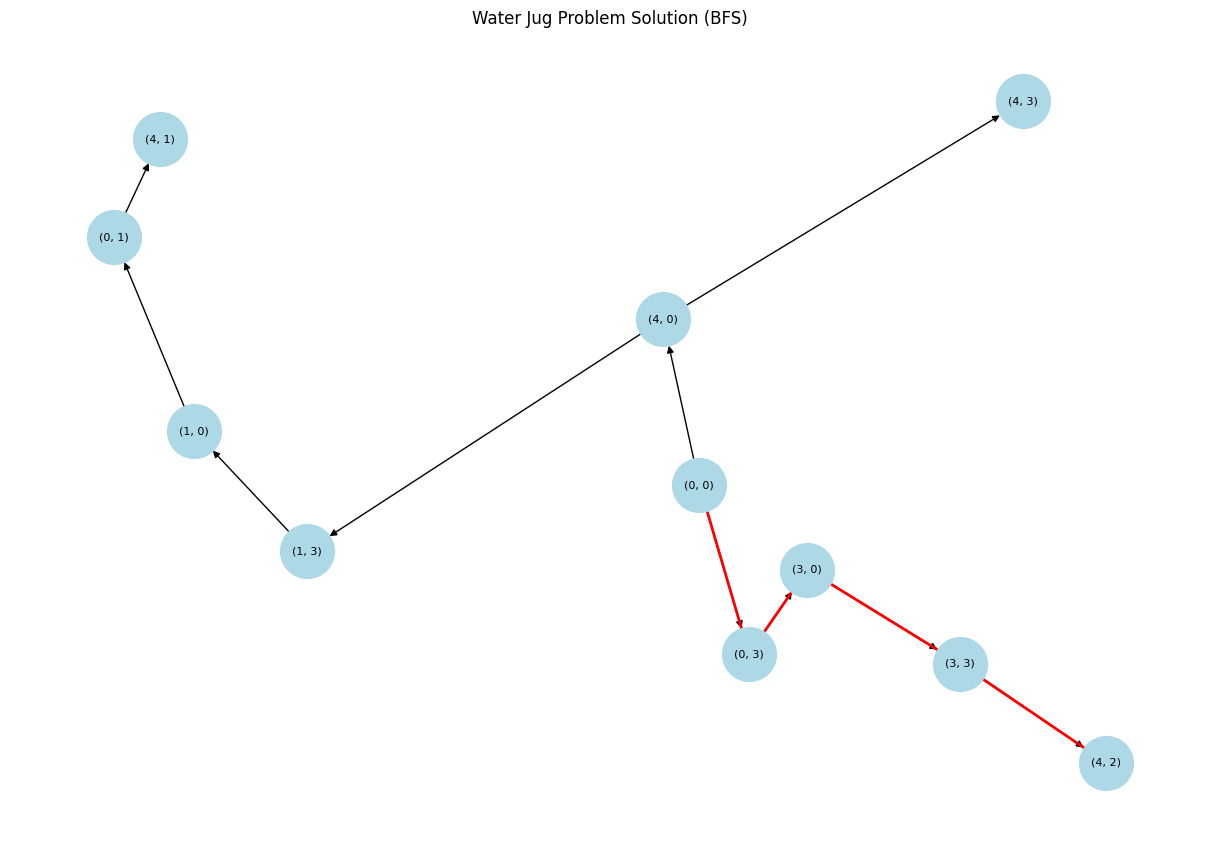


DFS Solution:
Jug1: 0L, Jug2: 0L
Jug1: 0L, Jug2: 3L
Jug1: 3L, Jug2: 0L
Jug1: 3L, Jug2: 3L
Jug1: 4L, Jug2: 2L


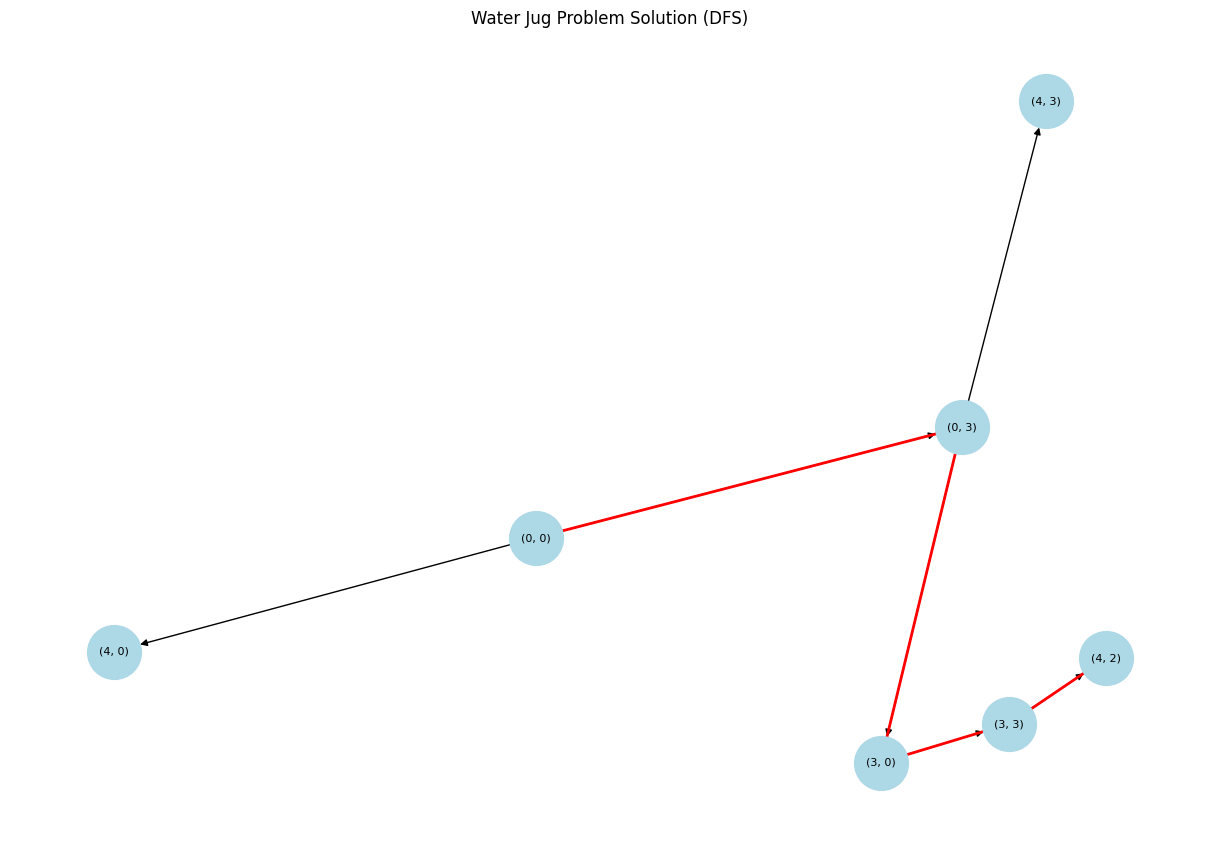

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

class WaterJugSolver:
    def __init__(self, jug1_capacity, jug2_capacity, target):
        self.jug1_capacity = jug1_capacity
        self.jug2_capacity = jug2_capacity
        self.target = target
        self.visited = set()
        self.graph = nx.DiGraph()

    def is_valid_state(self, state):
        jug1, jug2 = state
        return (0 <= jug1 <= self.jug1_capacity and 
                0 <= jug2 <= self.jug2_capacity)

    def get_next_states(self, current_state):
        jug1, jug2 = current_state
        next_states = []
        
        # Fill jug1
        next_states.append((self.jug1_capacity, jug2))
        
        # Fill jug2
        next_states.append((jug1, self.jug2_capacity))
        
        # Empty jug1
        next_states.append((0, jug2))
        
        # Empty jug2
        next_states.append((jug1, 0))
        
        # Pour jug1 to jug2
        pour_amount = min(jug1, self.jug2_capacity - jug2)
        next_states.append((jug1 - pour_amount, jug2 + pour_amount))
        
        # Pour jug2 to jug1
        pour_amount = min(jug2, self.jug1_capacity - jug1)
        next_states.append((jug1 + pour_amount, jug2 - pour_amount))
        
        return [state for state in next_states if self.is_valid_state(state)]

    def bfs(self):
        start_state = (0, 0)
        queue = deque([(start_state, [start_state])])
        self.visited = {start_state}
        
        while queue:
            current_state, path = queue.popleft()
            
            if self.target in current_state:
                return path
            
            for next_state in self.get_next_states(current_state):
                if next_state not in self.visited:
                    self.visited.add(next_state)
                    new_path = path + [next_state]
                    queue.append((next_state, new_path))
                    self.graph.add_edge(str(current_state), str(next_state))
        
        return None

    def dfs(self):
        start_state = (0, 0)
        stack = [(start_state, [start_state])]
        self.visited = {start_state}
        
        while stack:
            current_state, path = stack.pop()
            
            if self.target in current_state:
                return path
            
            for next_state in self.get_next_states(current_state):
                if next_state not in self.visited:
                    self.visited.add(next_state)
                    new_path = path + [next_state]
                    stack.append((next_state, new_path))
                    self.graph.add_edge(str(current_state), str(next_state))
        
        return None

    def visualize_solution(self, path, algorithm_name):
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', 
                node_size=1500, font_size=8, arrows=True)
        
        # Highlight solution path
        path_edges = list(zip(map(str, path[:-1]), map(str, path[1:])))
        nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges, 
                             edge_color='r', width=2)
        
        plt.title(f"Water Jug Problem Solution ({algorithm_name})")
        plt.show()

# Example usage
def solve_water_jug_problem():
    solver = WaterJugSolver(4, 3, 2)  # Jug1: 4L, Jug2: 3L, Target: 2L
    
    # Solve using BFS
    bfs_solution = solver.bfs()
    if bfs_solution:
        print("\nBFS Solution:")
        for state in bfs_solution:
            print(f"Jug1: {state[0]}L, Jug2: {state[1]}L")
        solver.visualize_solution(bfs_solution, "BFS")
    
    # Reset graph for DFS
    solver.graph.clear()
    
    # Solve using DFS
    dfs_solution = solver.dfs()
    if dfs_solution:
        print("\nDFS Solution:")
        for state in dfs_solution:
            print(f"Jug1: {state[0]}L, Jug2: {state[1]}L")
        solver.visualize_solution(dfs_solution, "DFS")

if __name__ == "__main__":
    solve_water_jug_problem()